In [2]:
cd /content/drive/MyDrive/eduTechPM12/데이터분석기초/spam_message_classification

/content/drive/MyDrive/eduTechPM12/데이터분석기초/spam_message_classification


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("0608_merged_kor_eng_sms.csv")  # 전처리 이전 버전

In [ ]:
# 3. 언어 감지 함수 (한글 여부 기준)
def detect_language(text):
    if pd.isnull(text):
        return "unknown"
    return "korean" if any('\uac00' <= char <= '\ud7a3' for char in text) else "english"

df["language"] = df["text"].apply(detect_language)

# 4. label 컬럼 확인 및 통일
if "label" in df.columns:
    df["label_str"] = df["label"].map({0: "ham", 1: "spam", "ham": "ham", "spam": "spam"})
elif "label_encoded" in df.columns:
    df["label_str"] = df["label_encoded"].map({0: "ham", 1: "spam"})
else:
    raise ValueError("label 또는 label_encoded 컬럼이 필요합니다.")

# 5. 언어-라벨 조합별 카운트
lang_label_counts = df.groupby(["language", "label_str"]).size().reset_index(name="count")




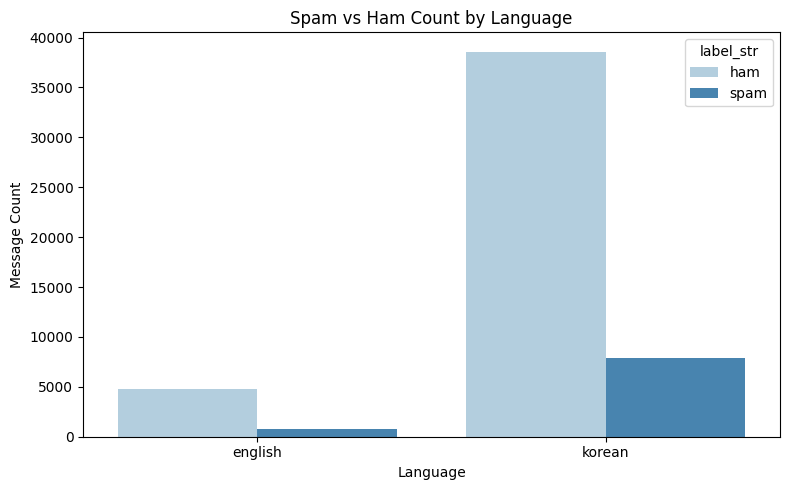

In [8]:
# 6. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=lang_label_counts, x="language", y="count", hue="label_str", palette="Blues")
plt.title("Spam vs Ham Count by Language")
plt.xlabel("Language")
plt.ylabel("Message Count")
plt.tight_layout()
plt.show()


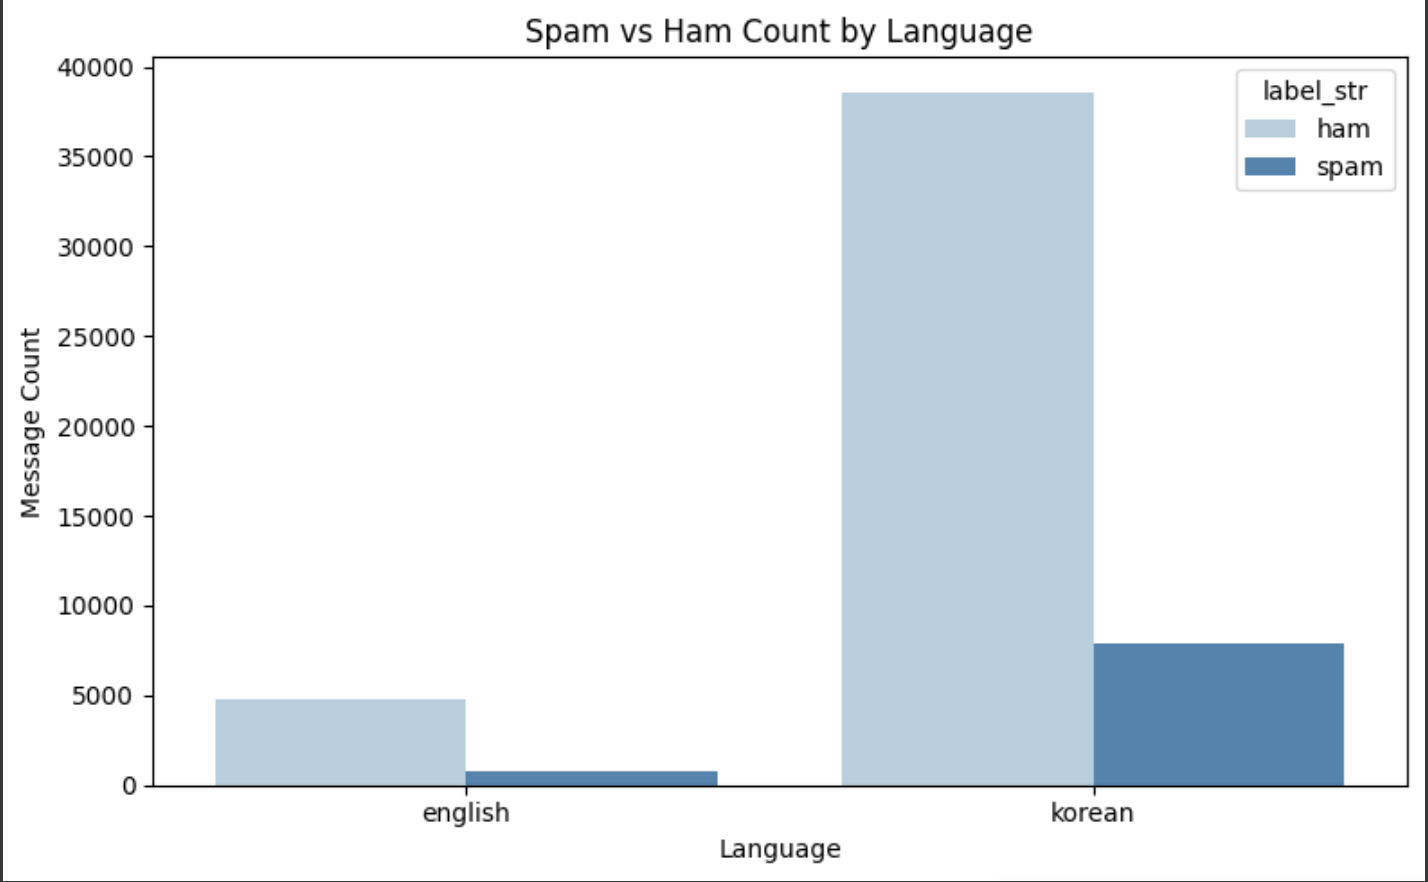

In [9]:
import pandas as pd

# 2. 각 컬럼의 결측값 개수 확인
missing_counts = df.isnull().sum()

# 3. 결측값이 있는 컬럼만 필터링
missing_counts = missing_counts[missing_counts > 0]

# 4. 출력
if missing_counts.empty:
    print("✅ 결측값이 있는 컬럼이 없습니다.")
else:
    print("⚠️ 결측값이 있는 컬럼과 개수:")
    print(missing_counts)

✅ 결측값이 있는 컬럼이 없습니다.


In [14]:
import pandas as pd

# 1. 파일 로드
df = pd.read_csv("0608_merged_kor_eng_sms.csv")

# 2. 중복된 텍스트 추출 (전체 중복 행 보기)
duplicates = df[df.duplicated(subset="text", keep=False)]
# 2. 중복된 text 수 확인
duplicate_count = df["text"].duplicated().sum()
print(f"중복된 텍스트 개수: {duplicate_count}")
print("중복 텍스트:")
print(duplicates.sort_values("text").head(10))  # 상위 10개만 확인

중복된 텍스트 개수: 502
중복 텍스트:
      label            text  label_encoded
21575   ham   7로 나온다든데 아니었나              0
21674   ham   7로 나온다든데 아니었나              0
32412   ham          감사합니다!              0
5444    ham          감사합니다!              0
1123    ham          감사합니다.              0
18325   ham          감사합니다.              0
1277    ham          감사합니다.              0
31451   ham      고수님들 도와주세요              0
4840    ham      고수님들 도와주세요              0
25587   ham     남자친구가 떠날까봐요              0


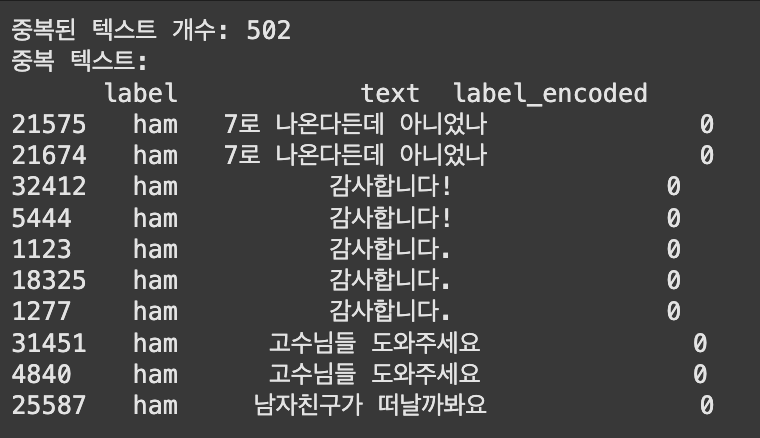

In [16]:
# 3. 중복 제거 (keep='first' 또는 'last'로 조절 가능)
df_dedup = df.drop_duplicates(subset="text", keep="first")

# 4. 저장
df_dedup.to_csv("0608_merged_kor_eng_sms_dedup.csv", index=False, encoding="utf-8-sig")
print("✅ 중복 제거된 파일 저장 완료: 0608_merged_kor_eng_sms_dedup.csv")

✅ 중복 제거된 파일 저장 완료: 0608_merged_kor_eng_sms_dedup.csv


In [17]:
df_dedup = pd.read_csv("0608_merged_kor_eng_sms_dedup.csv")

In [19]:
# 2. 중복된 텍스트 추출 (전체 중복 행 보기)
duplicates = df_dedup[df_dedup.duplicated(subset="text", keep=False)]
# 2. 중복된 text 수 확인
duplicate_count = df_dedup["text"].duplicated().sum()
print(f"중복된 텍스트 개수: {duplicate_count}")

중복된 텍스트 개수: 0


In [20]:
df_dedup

,label,text,label_encoded
0,ham,티벳가기 편하겠네,0
1,ham,선빈이와서10승이하투수들이랑만붙었잖아..이제15승급투수들이랑붙어보고..설레발치라,0
2,ham,방구 3시간동안 딱 1번만 뀜.신기해.,0
3,spam,{제412회} 할렐루야! 기린선교회 이카호중앙교회에서 일본선교소식과 신규 동영상 안...,1
4,ham,"할애비,애비,애새끼 까지...",0
...,...,...,...
51553,spam,This is the 2nd time we have tried 2 contact u...,1
51554,ham,Will ü b going to esplanade fr home?,0
51555,ham,"Pity, * was in mood for that. So...any other s...",0
51556,ham,The guy did some bitching but I acted like i'd...,0


In [21]:
df_dedup.shape

(51558, 3)

In [22]:
df.shape

(52060, 3)

In [23]:
df = df_dedup

In [24]:
# 3. 언어 감지 함수 (한글 여부 기준)
def detect_language(text):
    if pd.isnull(text):
        return "unknown"
    return "korean" if any('\uac00' <= char <= '\ud7a3' for char in text) else "english"

df["language"] = df["text"].apply(detect_language)

# 4. label 컬럼 확인 및 통일
if "label" in df.columns:
    df["label_str"] = df["label"].map({0: "ham", 1: "spam", "ham": "ham", "spam": "spam"})
elif "label_encoded" in df.columns:
    df["label_str"] = df["label_encoded"].map({0: "ham", 1: "spam"})
else:
    raise ValueError("label 또는 label_encoded 컬럼이 필요합니다.")

# 5. 언어-라벨 조합별 카운트
lang_label_counts = df.groupby(["language", "label_str"]).size().reset_index(name="count")




In [26]:
lang_label_counts

,language,label_str,count
0,english,ham,4518
1,english,spam,641
2,korean,ham,38507
3,korean,spam,7892


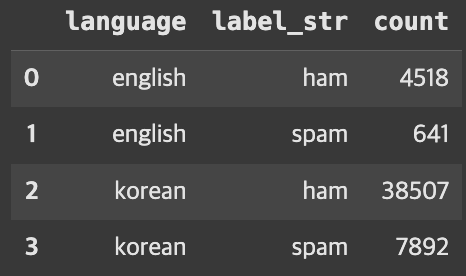

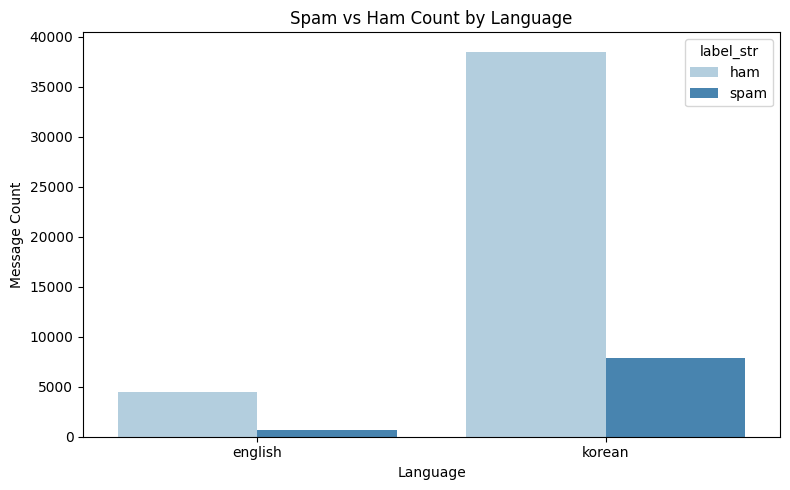

In [25]:
# 6. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=lang_label_counts, x="language", y="count", hue="label_str", palette="Blues")
plt.title("Spam vs Ham Count by Language")
plt.xlabel("Language")
plt.ylabel("Message Count")
plt.tight_layout()
plt.show()


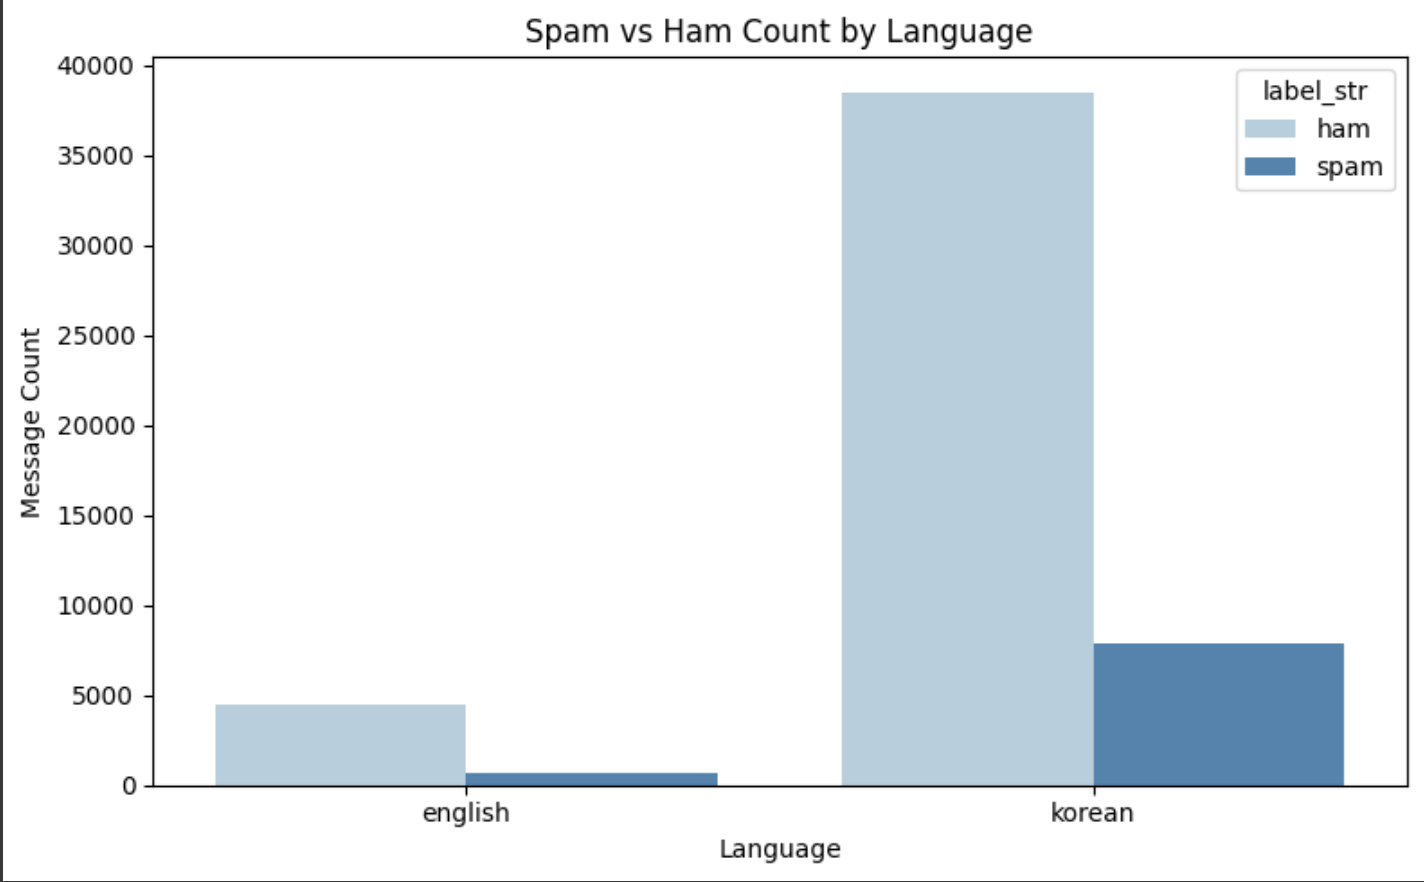